# Classifying on real data


In [25]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import sys
import json
import matplotlib.pyplot as plt
from master_scripts.data_functions import *
from master_scripts.analysis_functions import *
from master_scripts.plotting import plot_event
from tqdm import tqdm
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data import

In [1]:
config = {
    "DATA_PATH": "../../data/real/",
    "DATA_FILENAME": "anodedata_500k.txt",
    "SAMPLE_PATH": "../../data/sample/CeBr10k_1.txt",
    "MODEL_PATH": "../../data/output/models/",   
    "OUTPUT_PATH": "../../data/output/",
    "CLASSIFIER": "Project-0.97.hdf5",                      
    "SINGLE_ENERGY_MODEL": "cnn_energy_single_r2_0.97.hdf5",    
    "SINGLE_POSITION_MODEL": "cnn_pos_single_mse_0.00083.hdf5",
    "DOUBLE_ENERGY_MODEL": "double_energy_model_name.hdf5",    
    "DOUBLE_POSITION_MODEL": "double_position_model_name.hdf5" 
}



In [20]:
events, images = import_real_data(config) # images not normalized
#images = normalize_image_data(images)

# load classification results (doesn't contain images)
with open(config['OUTPUT_PATH']+"events_classified_" + config['DATA_FILENAME'][:-4] +".json") as fp:
    events = json.load(fp)


In [21]:
descriptors = list([event['event_descriptor'] for event in events.values()])
print(descriptors.count(16))

17


# Results
## Plots
### Histogram of descriptor vs predicted class

## Preliminary results on anodedata_short.txt
|Event descriptor | Event type                   | singles | doubles |
| :---           |  :---:                       | :---:   | :---:   |
|        1        |           Implant            |  1743   |  87974  |
|        2        |            Decay             | 260147  |    0    |
|        4        |          Light ion           |  20537  | 128963  |
|        9        |   Implant + Double (time)    |    1    |    0    |
|       10        |    Decay + Double (time)     |   614   |    0    |
|       12        |  Light ion + Double (time)   |    3    |    0    |
|       16        |        Double (space)        |   11    |    6    |



In [22]:
# Extract doubles
doubles = []
for event_id, event in events.items():
    if event['event_descriptor'] == 16:
        doubles.append(event_id)

In [23]:
print(len(doubles))

17


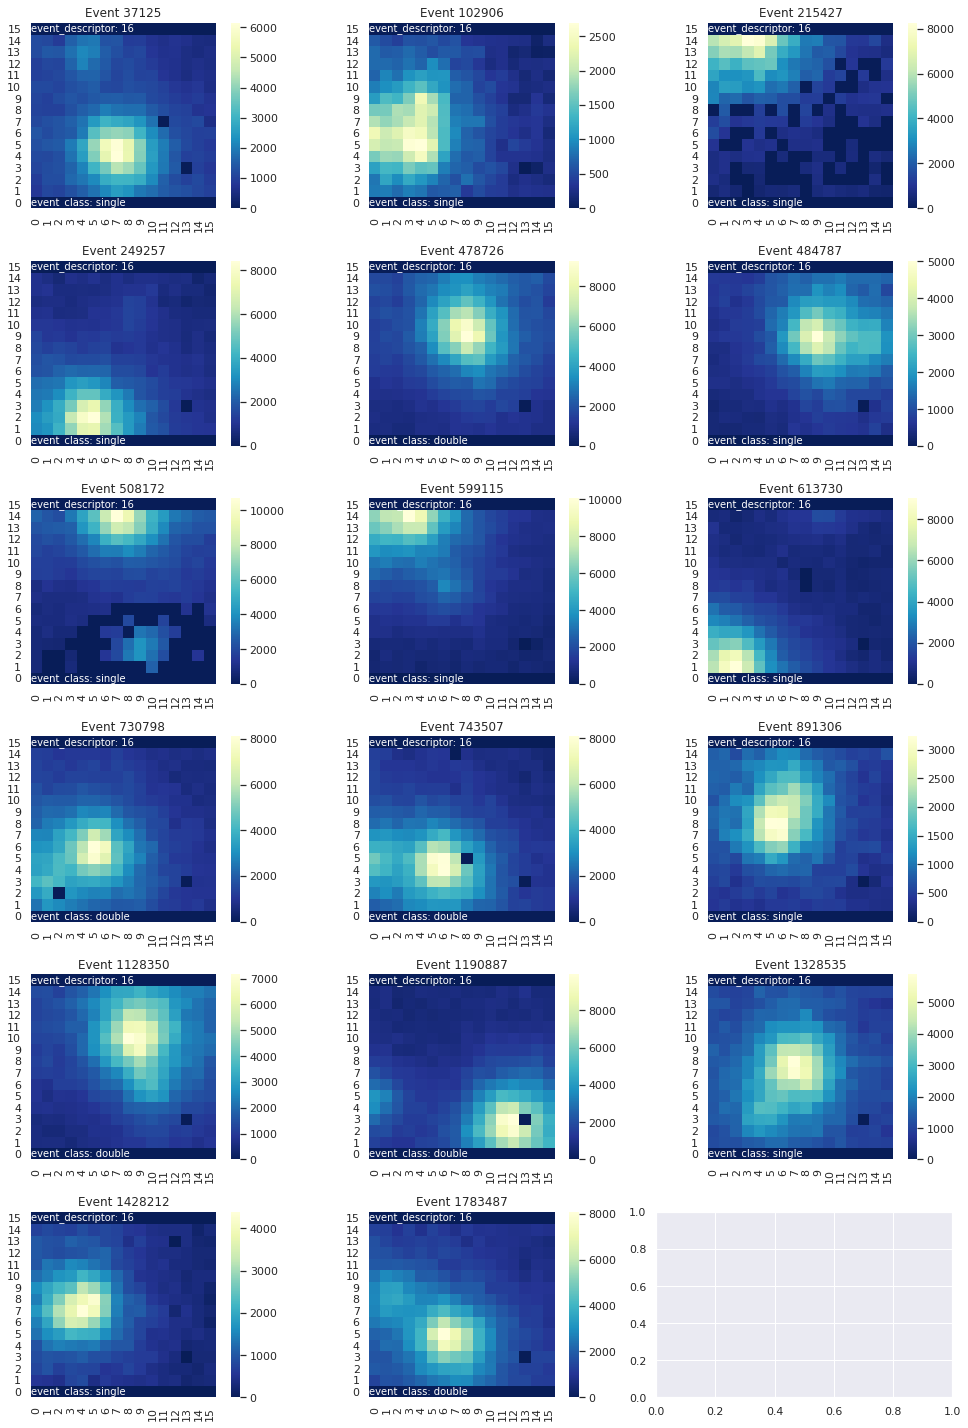

In [64]:
# Plot the doubles and event_class from model
fig, axes = plt.subplots(6,3, figsize=(14,20), tight_layout=True)
idx = 0
for row in axes:
    for ax_col in row:
        if idx >= len(doubles):
            break
        curr_event = events[doubles[idx]]
        plot_event(curr_event, doubles[idx], images[curr_event['image_idx']], ax_col)
        idx += 1
#fig.savefig("test.pdf")
    
    